In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Create points

# Cartesian
point_max = 3
y = np.linspace(-point_max, point_max)
z = np.linspace(-point_max, point_max)
Y, Z = np.meshgrid(y, z)

# Polar
r = np.sqrt(Y ** 2 + Z ** 2)
theta = np.arccos(z / r)

In [25]:
# Velocity field
a = 1  # Squirmer radius
v_r = (1 - 3 * a / (2 * r) - a ** 3 / (2 * r ** 3)) * np.cos(theta)
v_theta = -(1 - 3 * a / (4 * r) + a ** 3 / (4 * r ** 3)) * np.sin(theta)

# Remove inside squirmer
v_r[r**2 < a**2] = 0
v_theta[r**2 < a**2] = 0

# Convert to cartesian
phi = np.pi / 2
u_z = np.cos(theta) * v_r - np.sin(theta) * v_theta
u_y = v_r * np.sin(theta) * np.sin(phi) + v_theta * np.cos(theta) * np.sin(phi)

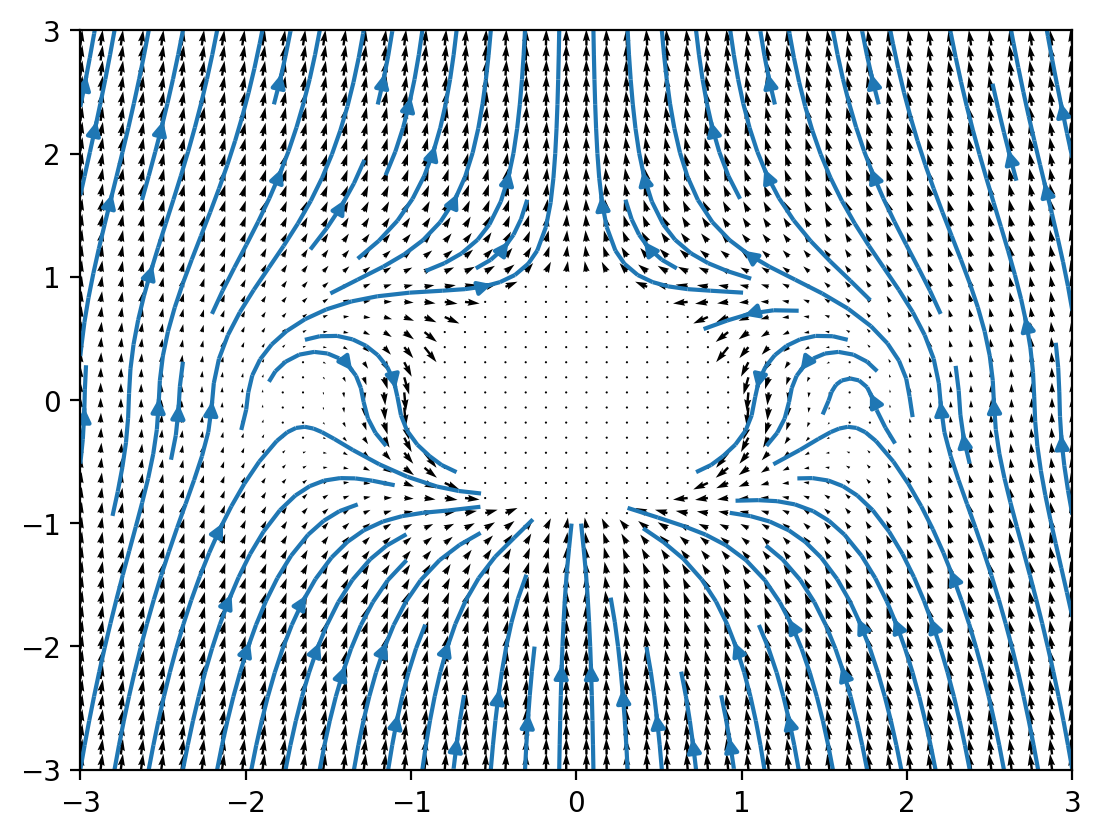

In [26]:
# Plot
fig, ax = plt.subplots(dpi=200)
ax.quiver(Y, Z, u_y, u_z)
ax.streamplot(Y, Z, u_y, u_z)